In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Data Cleaning (KaggleMovies.csv)

In [216]:
df = pd.read_csv('Datasets/KaggleMovies.csv')
pd.set_option('float_format', '{:f}'.format)

In [217]:
# Renaming columns
column_mapping = {
    'name' : 'Name',
    'rating' : 'Rating',
    'genre' : 'Genre',
    'year' : 'Year',
    'released' : 'Released',
    'score' : 'Score',
    'votes' : 'Votes',
    'director' : 'Director',
    'writer' : 'Writer',
    'star' : 'Star',
    'country' : 'Country',
    'budget' : 'Budget',
    'gross' : 'Gross Revenue',
    'company' : 'Company',
    'runtime' : 'Runtime'
}

df = df.rename(columns=column_mapping)

In [218]:
# Check for empty spaces
print(f"Shape: {df.shape}\n")
isnas = df.isna().sum(axis=0)
isnas

Shape: (7668, 15)



Name                0
Rating             77
Genre               0
Year                0
Released            2
Score               3
Votes               3
Director            0
Writer              3
Star                1
Country             3
Budget           2171
Gross Revenue     189
Company            17
Runtime             4
dtype: int64

In [219]:
# Remove rows with null values
df = df.dropna()
print(f"Shape: {df.shape}\n")
print(df.isna().sum(axis=0))

Shape: (5421, 15)

Name             0
Rating           0
Genre            0
Year             0
Released         0
Score            0
Votes            0
Director         0
Writer           0
Star             0
Country          0
Budget           0
Gross Revenue    0
Company          0
Runtime          0
dtype: int64


In [220]:
df['Votes'] = df['Votes'].astype('int')
df['Budget'] = df['Budget'].astype('int')
df['Runtime'] = df['Runtime'].astype('int')
df['Gross Revenue'] = df['Gross Revenue'].astype('int')
df['Score'] = df['Score'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
# Note: For some reason the 'Gross Revenue' column is not detected making me unable to remove trailing 0s in the column
#df['Gross Revenue'] = df['Gross Revenue'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
df.head()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross Revenue,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [221]:
# Check number of unique movie names
len(df['Name'].unique())

5336

In [222]:
#Drop duplicate movie names
df = df.drop_duplicates(subset=['Name'], keep='first')
print(f"Shape: {df.shape}\n")
df.head()

Shape: (5336, 15)



,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross Revenue,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [223]:
print(len(df['Rating'].unique()))
print(len(df['Genre'].unique()))
print(len(df['Director'].unique()))
print(len(df['Writer'].unique()))
print(len(df['Star'].unique()))
print(len(df['Country'].unique()))
print(len(df['Company'].unique()))

10
15
2045
3178
1830
50
1464


In [224]:
df.describe()

,Year,Votes,Budget,Gross Revenue,Runtime
count,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000
mean,2001.507309,114229.701274,35649050.434595,101592426.155922,108.087706
std,10.521542,183538.251077,41241714.683371,184167193.593346,18.110382
min,1980.000000,195.000000,6000.000000,309.000000,63.000000
25%,1993.000000,19000.000000,10000000.000000,10622833.750000,95.000000
50%,2002.000000,52000.000000,21000000.000000,35927567.000000,105.000000
75%,2010.000000,128000.000000,45000000.000000,110353970.000000,118.000000
max,2020.000000,2400000.000000,356000000.000000,2847246203.000000,271.000000


<Axes: xlabel='Votes', ylabel='Count'>

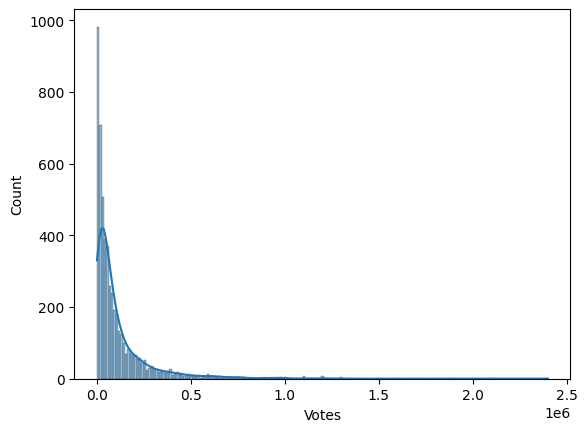

In [225]:
sns.histplot(df['Votes'], kde=True)

In [226]:
df['Votes'] = df['Votes'].apply(lambda x: 500000 if x > 500000 else x)

<Axes: xlabel='Votes', ylabel='Count'>

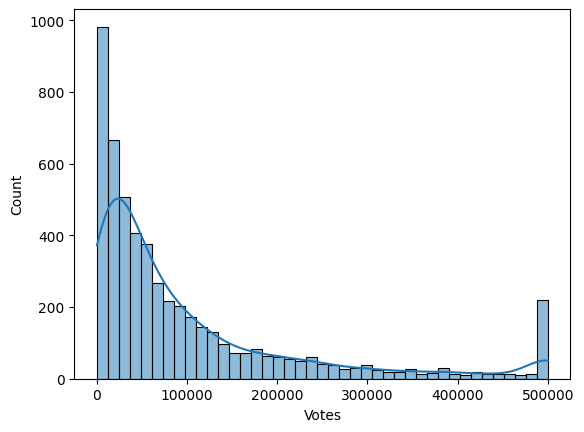

In [227]:
sns.histplot(df['Votes'], kde=True)

<Axes: xlabel='Gross Revenue', ylabel='Count'>

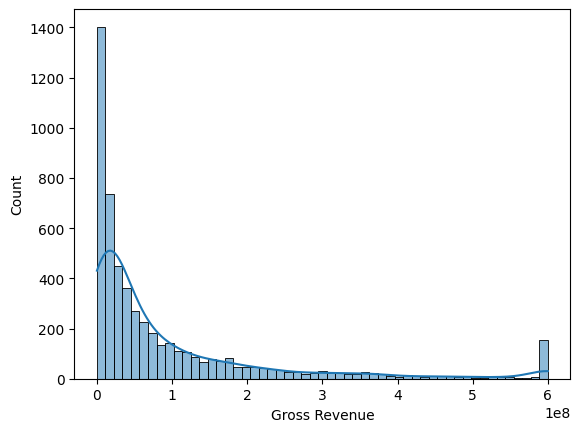

In [228]:
df['Gross Revenue'] = df['Gross Revenue'].apply(lambda x: 600000000 if x > 600000000 else x)
sns.histplot(df['Gross Revenue'], kde=True)

<Axes: xlabel='Budget', ylabel='Count'>

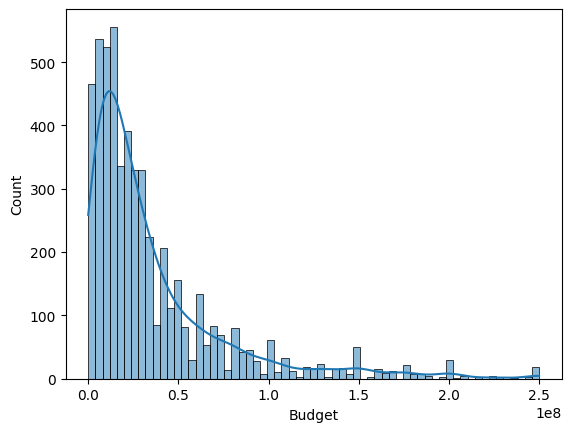

In [229]:
df['Budget'] = df['Budget'].apply(lambda x: 250000000 if x > 250000000 else x)
sns.histplot(df['Budget'], kde=True)

<Axes: xlabel='Year', ylabel='Count'>

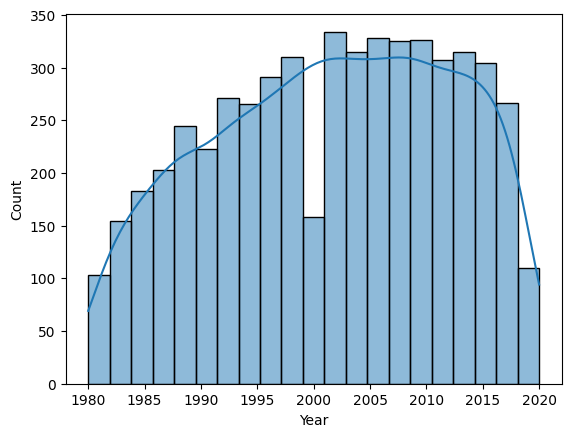

In [230]:
sns.histplot(df['Year'], kde=True)

In [231]:
excluded_columns = ['Rating', 'Year']


numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.difference(excluded_columns)

df_new = df.copy()
df_new[numerical_cols] = df[numerical_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_new.head()

,Name,Rating,Genre,Year,Released,Score,Votes,Director,Writer,Star,Country,Budget,Gross Revenue,Company,Runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,1.000000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,0.075978,0.078331,Warner Bros.,0.399038
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,0.129661,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,0.017976,0.098088,Columbia Pictures,0.197115
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1.000000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,0.071978,0.897292,Lucasfilm,0.293269
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,0.441782,Jim Abrahams,Jim Abrahams,Robert Hays,United States,0.013976,0.139089,Paramount Pictures,0.120192
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,0.215694,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,0.023977,0.066410,Orion Pictures,0.168269


In [232]:
df_new = df_new.drop(['Director', 'Company', 'Writer', 'Star', 'Released'], axis=1)
df_new['Score'] = df_new['Score'].astype(float)
df_new.head()

,Name,Rating,Genre,Year,Score,Votes,Country,Budget,Gross Revenue,Runtime
0,The Shining,R,Drama,1980,8.400000,1.000000,United Kingdom,0.075978,0.078331,0.399038
1,The Blue Lagoon,R,Adventure,1980,5.800000,0.129661,United States,0.017976,0.098088,0.197115
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.700000,1.000000,United States,0.071978,0.897292,0.293269
3,Airplane!,PG,Comedy,1980,7.700000,0.441782,United States,0.013976,0.139089,0.120192
4,Caddyshack,R,Comedy,1980,7.300000,0.215694,United States,0.023977,0.066410,0.168269


In [233]:
correlation_matrix = df_new.corr()
correlation_matrix

<ipython-input-233-1d0e9eeeb5d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_new.corr()


,Year,Score,Votes,Budget,Gross Revenue,Runtime
Year,1.000000,0.061236,0.286490,0.327309,0.301862,0.075414
Score,0.061236,1.000000,0.501104,0.070100,0.231637,0.413459
Votes,0.286490,0.501104,1.000000,0.510067,0.715947,0.350702
Budget,0.327309,0.070100,0.510067,1.000000,0.758838,0.316680
Gross Revenue,0.301862,0.231637,0.715947,0.758838,1.000000,0.268553
Runtime,0.075414,0.413459,0.350702,0.316680,0.268553,1.000000


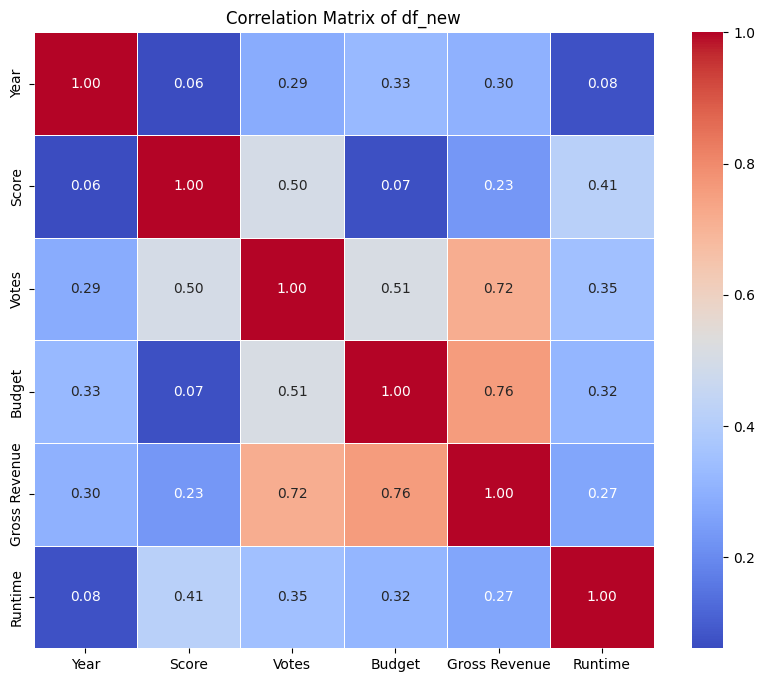

In [234]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of df_new')
plt.show()

In [171]:
df_new_encoded = pd.get_dummies(df_new, columns=['Rating', 'Genre'])
df_new_encoded.head()


,Name,Year,Released,Score,Votes,Country,Budget,Gross Revenue,Runtime,Rating_Approved,...,Genre_Crime,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_Horror,Genre_Mystery,Genre_Romance,Genre_Sci-Fi,Genre_Thriller,Genre_Western
0,The Shining,1980,"June 13, 1980 (United States)",8.4,1.000000,United Kingdom,0.075978,0.078331,0.399038,0,...,0,1,0,0,0,0,0,0,0,0
1,The Blue Lagoon,1980,"July 2, 1980 (United States)",5.8,0.129661,United States,0.017976,0.098088,0.197115,0,...,0,0,0,0,0,0,0,0,0,0
2,Star Wars: Episode V - The Empire Strikes Back,1980,"June 20, 1980 (United States)",8.7,1.000000,United States,0.071978,0.897292,0.293269,0,...,0,0,0,0,0,0,0,0,0,0
3,Airplane!,1980,"July 2, 1980 (United States)",7.7,0.441782,United States,0.013976,0.139089,0.120192,0,...,0,0,0,0,0,0,0,0,0,0
4,Caddyshack,1980,"July 25, 1980 (United States)",7.3,0.215694,United States,0.023977,0.066410,0.168269,0,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning (UCI Dataset)

In [16]:
# NOTE: UCI dataset not complete. The html file is formatted in way that makes creating a dataframe from it
# difficult to accomplish.

# url = 'Datasets/main.html'

# MAIN_df = pd.read_html(url)

# total_dataframe = []

# # Remove any NaNs
# for i in range(len(MAIN_df)):
#     MAIN_df[i].dropna(inplace=True)
# #    print(pd.isna(MAIN_df[i]))

# # Create a list of dataframes created from read_html(url)
# for j, df in enumerate(MAIN_df):
#     total_dataframe.append(MAIN_df[j])

# combined = pd.concat(total_dataframe, ignore_index=True)

# combined


In [17]:
# Function to pop indices that don't have exactly 12 columns
def pop_multiple_indices(dataframes, indices):
    # Sort the indices in descending order so that popping does not affect the subsequent indices
    indices.sort(reverse=True)

    # Pop DataFrames from the list at the specified indices
    popped_dfs = [dataframes.pop(index) for index in indices]

    return popped_dfs

In [ ]:
url = 'Datasets/main.html'

MAIN_df = pd.read_html(url)

total_dataframe = []


# Renaming columns
column_mapping3 = {
    'title' : 'Title',
    'prds' : 'Producer',
    'prc.1' : 'Genre',
    'cat' : 'Awards',
    'ct' : "Genre",
    'aw' : "Awards",
    'st' : 'Studio',
    'st.' : 'Studio',
    'producers' : 'Producer',
    'prodrs' : 'Producer',
    'prods' : 'Producer',
    'prds' : 'Producer'
}
for i in range(len(MAIN_df)):
    MAIN_df[i] = MAIN_df[i].rename(columns=column_mapping3)

In [ ]:
# Check number of columns in each dataframe
counter = 0
indices = []
for i in range(len(MAIN_df)):
    num_columns = MAIN_df[i].shape[1]
    #print("Number of columns at index " + str(i) + ":", num_columns)
    if ((num_columns < 12) or (num_columns == 13)):
        #print("Pop at index " + str(i))
        counter = counter + 1
        indices.append(i)

# Check how many dataframes do not have 12 columns
# print(counter)
# print(indices)


In [ ]:
# Assuming dfs is your list of dataframes and indices is a list of indices you want to pop
popped_dfs = pop_multiple_indices(MAIN_df, indices)

counter2 = 0
indices2 = []
for i in range(len(MAIN_df)):
    num_columns = MAIN_df[i].shape[1]
    #print("Number of columns at index " + str(i) + ":", num_columns)
    if ((num_columns < 12) or (num_columns == 13)):
        #print("Pop at index " + str(i))
        counter2 = counter2 + 1
        indices2.append(i)

# Check that all dataframes have 12 columns
print("Number of dataframes that don't have 12 columns: " + str(counter2))
print("Indices where dataframe does not have 12 columns:", indices2)

In [ ]:
# Drop useless columns
for i in range(len(MAIN_df)):
    # Drop unneeded columns
    MAIN_df[i] = MAIN_df[i].drop(MAIN_df[i].columns[[0, 6, 9, 10, 11]], axis=1)
    #print('Dataframe ' + str(i) + ' is good')

# print(MAIN_df[0].columns)
# print(MAIN_df[567].columns)


In [ ]:
# Remove NaNs
clean_dfs = []
for i in range(len(MAIN_df)):
    clean_df = MAIN_df[i].dropna()  # Drop rows containing NaN values
    clean_dfs.append(clean_df)

MAIN_df = clean_dfs

In [ ]:
# Checking for out of place column names
counter3 = 0
indices3 = []
for i in range(len(MAIN_df)):
    if ((MAIN_df[i].columns[0] == 1) or (MAIN_df[i].columns[0] == 'Unnamed: 1')):
        counter3 = counter3 + 1
        indices3.append(i)

print(counter3)
print(indices3)

# Removing out of place column names
popped_dfs2 = pop_multiple_indices(MAIN_df, indices3)


In [ ]:
print(MAIN_df)

In [ ]:
# Eliminate unneccessary characters from 'Producer' (WIP)
# Current problem: "AttributeError: Can only use .str accessor with string values!"
# for i in range(len(MAIN_df)):
# # for i in range(1000):
#     contains_character1 = MAIN_df[i]['Producer'].str.contains('P:')
#     contains_character2 = MAIN_df[i]['Producer'].str.contains('PN:')
#     check1 = contains_character1.any()
#     check2 = contains_character2.any()
#     if (check1 == True):
#         MAIN_df[i]['Producer'] = MAIN_df[i]['Producer'].str.replace('P:', '', regex=True)
#     elif (check2 == True):
#         MAIN_df[i]['Producer'] = MAIN_df[i]['Producer'].str.replace('PN:', '', regex=True)
#     print("index " + str(i) + " is good")

In [ ]:
MAIN_df[1000]

# Data Cleaning (BoxOfficeCollections.csv)

In [ ]:
BoxOff_df = pd.read_csv('Datasets/BoxOfficeCollections.csv')

In [ ]:
print(list(BoxOff_df.columns.values))

# Renaming columns
column_mapping2 = {
    'Imdb_genre' : 'IMDB Genre',
    'metascore' : 'Metascore',
    'time_minute' : 'Time(Min)',
    'Movie' : 'Name',

}

BoxOff_df = BoxOff_df.rename(columns=column_mapping2)
BoxOff_df.head()
BoxOff_df.shape

In [ ]:

# Remove trailing zeros from the 'GrossRevenue' column
BoxOff_df['Adjusted Score'] = BoxOff_df['Adjusted Score'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
BoxOff_df['Box Office Collection'] = BoxOff_df['Box Office Collection'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
BoxOff_df['IMDB Rating'] = BoxOff_df['IMDB Rating'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
BoxOff_df['Metascore'] = BoxOff_df['Metascore'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
BoxOff_df['Time(Min)'] = BoxOff_df['Time(Min)'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)
BoxOff_df['Votes'] = BoxOff_df['Votes'].apply(lambda x: str(x).rstrip('0').rstrip('.') if isinstance(x, float) else x)

In [ ]:
# Remove rows with null values
BoxOff_df = BoxOff_df.dropna()
isnas3 = BoxOff_df.isna()
#print(isnas3)

BoxOff_df

In [ ]:
merged = pd.concat([df, BoxOff_df], axis=0).reset_index(drop=True)
merged